# Intellligent Data Analysis

## Data Set: #31
## Author 1: Vladimír Svitok
## Author 2: Juraj Baráth

## Prieskumná analýza (max. 12b)
Prieskumná analýza je kľúčovou časťou analýzy dát. Bez nej nie sme schopní dáta spracúvať, pretože nevieme, čo sa v nich nachádza. Využíva sa  pritom predovšetkým deskriptívna štatistika a rôzne podporné vizualizácie. 

V tejto fáze sa od vás očakáva:

- **Základný opis dát spolu s ich charakteristikami (3b).** Pre dosiahnutie plného počtu bodov uveďte počet záznamov, počet atribútov, ich typy a pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.
- **Párová analýza dát (4b).** Preskúmajte vzťahy medzi zvolenými dvojicami atribútov. Zamerajte sa pritom na identifikáciu závislostí medzi dvojicami atribútov (napr. korelácie) a na závislosti medzi predikovanou premennou a ostatnými premennými (potenciálnymi prediktormi).
- **Formulácia a štatistické overenie hypotéz o dátach (2b).** Mali by ste sformulovať aspoň dve hypotézy o dátach, ktoré budú relevantné v kontexte zadanej predikčnej úlohy. Príkladom hypotézy (v závislosti od pridelenej dátovej sady) môže byť, že *pacienti s chorobou štítnej žľazy majú v priemere inú (vyššiu/nižšiu) hodnotu nejakej látky alebo hormónu ako pacienti bez danej choroby*. Vami sformulované hypotézy overte vhodne zvoleným štatistickým testom.
- **Identifikácia problémov v dátach spolu s predpokladaným scenárom riešenia v ďalšej fáze (3b).** Mali by ste identifikovať, čo budete musieť v rámci predspracovania vyriešiť (aj s naznačením možností, ako tieto problémy plánujete v ďalšej fáze riešiť). Medzi problémy, na ktoré môžete v rámci analýzy naraziť, patria napr.: 
   - nevhodná štruktúra dát (dáta nie sú v tabuľkovej podobe alebo jedna entita je opísaná viacerými riadkami tabuľky)
   - duplicitné záznamy, resp. nejednoznačné mapovanie medzi záznamami
   - nejednotné formáty dát
   - chýbajúce hodnoty
   - vychýlené (odľahlé) hodnoty
   - a ďalšie, t. j. v dátach sa môžu nachádzať aj iné, tu nevymenované problémy, ktoré tiež treba identifikovať a vo vašej analýze adresovať.

V odovzdanej správe (`Jupyter Notebooku`) by ste tak mali vedieť zodpovedať na otázky:
- Majú dáta vhodný formát pre ďalšie spracovanie? Ak nie, aké problémy sa v nich vyskytujú?
- Sú niektoré atribúty medzi sebou závislé? Od ktorých (jednotlivých) atribútov závisí predikovaná premenná?
- Sú v dátach chýbajúce hodnoty? Ako sú reprezentované? Ako plánujete riešiť problém chýbajúcich hodnôt pre jednotlivé atribúty, resp. pozorovania? (Pre rôzne atribúty môže byť vhodné použiť rôzne stratégie.)
- Nadobúdajú niektoré atribúty nezmyselné (nekonzistentné) či inak výrazne odchýlené hodnoty? Ktoré?
- Ako plánujete v ďalšej fáze tieto identifikované problémy adresovať / riešiť?

Správa sa odovzdáva v 6. týždni semestra na cvičení (dvojica svojmu cvičiacemu odprezentuje vykonanú prieskumnú analýzu v `Jupyter Notebooku`). Následne správu elektronicky odovzdá jeden člen z  dvojice do systému AIS do **nedele 3.11.2019 do 23:59**.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
data=pd.read_csv('personal_train.csv')

In [3]:
data2=pd.read_csv('other_train.csv')

In [4]:
# Check how does the personal train data (data) look like
data.head(30)

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",60,Male,1959-09-26
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",52,Male,1966-10-28
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",60,Male,1959-06-16
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",39,Male,1980-09-09
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",49,Male,1970-02-22
5,5,Ronald Lange,"30973 Martinez Shores\r\nJameston, CA 70245",46,Male,1973-09-25
6,6,Boyd Eiselein,29941 Christopher Curve Apt. 682\r\nRaychester...,54,Female,1964-10-31
7,7,Raymond Smith,53487 Scott Extensions Apt. 824\r\nMccartytown...,67,Male,1952-07-23
8,8,Harold Miller,"8514 Elizabeth Crescent\r\nWest Joseland, GA 4...",52,Male,1967-06-28
9,9,Charles Czachorowski,"6798 Wagner Locks Suite 377\r\nLake Brenda, DC...",30,Male,1988-11-07


In [5]:
# Check how does the other train data (data2) look like
data2.head(30)

,Unnamed: 0,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,0,Mike Riley,023 Joseph Estate Suite 799\r\nLake Andrewvill...,White,Married-civ-spouse,Prof-specialty,f,12.0,Husband,1.605420,...,Assoc-acdm,251396.0,0.0,37.450318,>50K,"{'mean_oxygen':'10.03511706','std_oxygen':'35....",Canada,45.0,0.0,Local-gov
1,1,Earl Hoffmann,"700 Darlene Mill\r\nJackburgh, GA 99369",White,Divorced,Craft-repair,f,9.0,Unmarried,10.994893,...,HS-grad,157446.0,1.0,33.842927,<=50K,"{'mean_oxygen':'7.834448161','std_oxygen':'33....",United-States,45.0,0.0,Private
2,2,Lorenzo Mann,"56863 Stephen Island\r\nSouth Danielle, NV 40760",White,Divorced,Craft-repair,t,10.0,Not-in-family,-0.290893,...,Some-college,106014.0,0.0,51.123164,<=50K,"{'mean_oxygen':'3.505852843','std_oxygen':'19....",United-States,60.0,0.0,Private
3,3,Justin Trevino,"18446 Pace Junction\r\nNew Christyfurt, SD 32280",White,Never-married,Tech-support,f,13.0,Not-in-family,13.476089,...,Bachelors,189590.0,1.0,45.923142,<=50K,"{'mean_oxygen':'83.55351171','std_oxygen':'66....",United-States,40.0,0.0,Private
4,4,Thomas Davis,"67753 Wilson Ford\r\nNew Rachelport, NV 50148",White,Married-civ-spouse,Transport-moving,f,9.0,Husband,0.680234,...,HS-grad,134768.0,0.0,46.867134,>50K,"{'mean_oxygen':'2.602842809','std_oxygen':'18....",United-States,40.0,0.0,Private
5,5,Lynn Quist,"2232 Flores Ridge\r\nSanchezstad, IL 31455",White,Divorced,Transport-moving,f,9.0,Not-in-family,1.315007,...,HS-grad,143542.0,0.0,40.466252,<=50K,"{'mean_oxygen':'4.886287625','std_oxygen':'24....",United-States,40.0,0.0,Private
6,6,Roscoe Shelton,"6954 Carrillo Shoals Apt. 139\r\nSandersview, ...",White,Married-civ-spouse,Adm-clerical,f,13.0,Husband,2.731511,...,Bachelors,259840.0,0.0,35.750382,<=50K,"{'mean_oxygen':'1.705685619','std_oxygen':'17....",United-States,45.0,0.0,Private
7,7,Jose Aigner,"76756 Ashley Mount\r\nGomezchester, NV 49283",White,Divorced,Sales,f,13.0,Not-in-family,2.022478,...,Bachelors,364548.0,0.0,39.279398,>50K,"{'mean_oxygen':'2.117056856','std_oxygen':'15....",United-States,40.0,0.0,Private
8,8,Robert Gerke,"820 Mark Drives\r\nMichaelchester, OH 64396",White,Married-civ-spouse,Sales,F,10.0,Husband,0.169639,...,Some-college,114520.0,0.0,49.502052,<=50K,"{'mean_oxygen':'5.197324415','std_oxygen':'26....",United-States,40.0,0.0,Self-emp-not-inc
9,9,Andre Bennett,"25878 Hector Canyon\r\nJerryfurt, AZ 38098",White,Never-married,Prof-specialty,f,11.0,Not-in-family,0.743007,...,Assoc-voc,436770.0,0.0,40.479149,<=50K,"{'mean_oxygen':'0.766722408','std_oxygen':'9.5...",United-States,40.0,0.0,Private


In [6]:
# Rename the 'Unnamed: 0' column to 'id'
data.rename(columns={data.columns[0]:"id"}, inplace=True)
data2.rename(columns={data2.columns[0]:"id"}, inplace=True)

In [7]:
# Check the columns of data and data 2
print(list(data.columns))
print(list(data2.columns))

['id', 'name', 'address', 'age', 'sex', 'date_of_birth']
['id', 'name', 'address', 'race', 'marital-status', 'occupation', 'pregnant', 'education-num', 'relationship', 'skewness_glucose', 'mean_glucose', 'capital-gain', 'kurtosis_glucose', 'education', 'fnlwgt', 'class', 'std_glucose', 'income', 'medical_info', 'native-country', 'hours-per-week', 'capital-loss', 'workclass']


In [8]:
# Count the number of entries in data
len(data)

3933

In [9]:
# Count the number of entries in data2
len(data2)

3983

In [10]:
# Check the possible values of columns having less than 50 possible values
def print_col_values(d):
    for c in d.columns:
        l = list(d.drop_duplicates(c)[c])
        if len(l) < 50:
            print('••► '+c+' ('+str(len(l))+'): '+str(l),end='\n\n')
print('===== Data =====')
print_col_values(data)
print('==== Data 2 =====')
print_col_values(data2)

===== Data =====
••► sex (2): [' Male', ' Female']

==== Data 2 =====
••► race (6): [' White', ' Amer-Indian-Eskimo', ' Black', nan, ' Asian-Pac-Islander', ' Other']

••► marital-status (8): [' Married-civ-spouse', ' Divorced', ' Never-married', ' Widowed', ' Married-spouse-absent', ' Separated', nan, ' Married-AF-spouse']

••► occupation (16): [' Prof-specialty', ' Craft-repair', ' Tech-support', ' Transport-moving', ' Adm-clerical', ' Sales', ' Other-service', ' Exec-managerial', ' Machine-op-inspct', ' Protective-serv', ' Farming-fishing', ' Handlers-cleaners', ' ?', ' Priv-house-serv', nan, ' Armed-Forces']

••► pregnant (7): ['f', 't', 'F', 'FALSE', 'T', nan, 'TRUE']

••► education-num (17): [12.0, 9.0, 10.0, 13.0, 11.0, 6.0, 16.0, 3.0, 14.0, 8.0, 5.0, 7.0, 4.0, nan, 15.0, 2.0, 1.0]

••► relationship (7): [' Husband', ' Unmarried', ' Not-in-family', ' Own-child', ' Wife', ' Other-relative', nan]

••► education (17): [' Assoc-acdm', ' HS-grad', ' Some-college', ' Bachelors', ' Asso

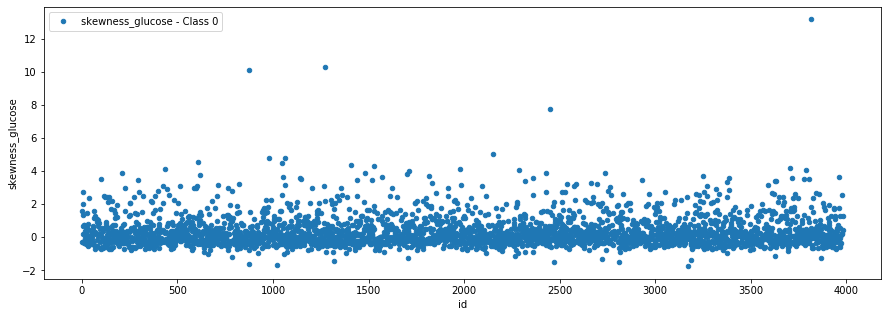

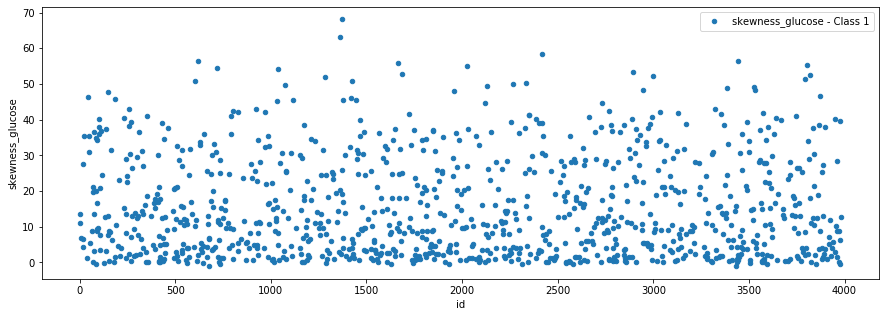

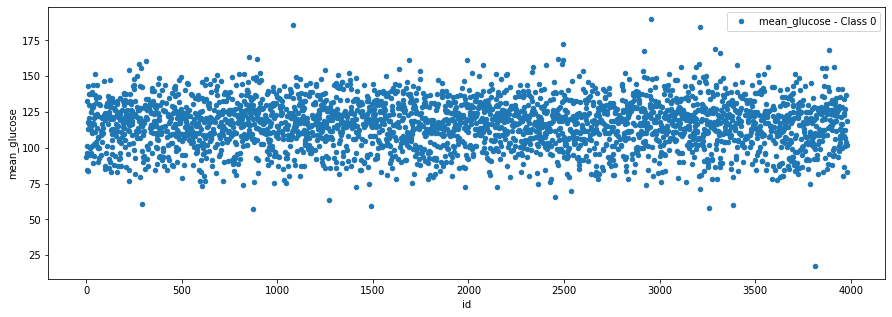

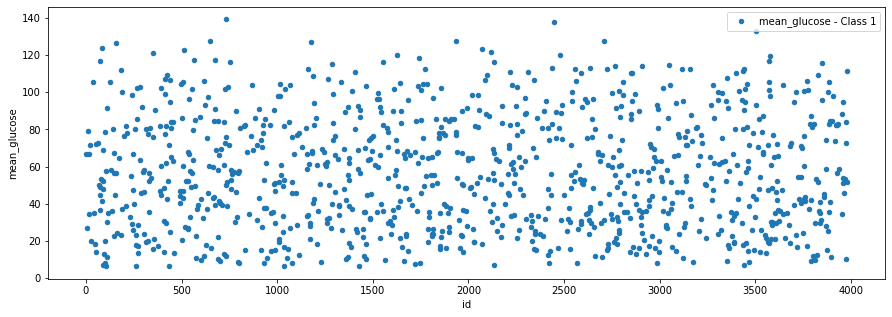

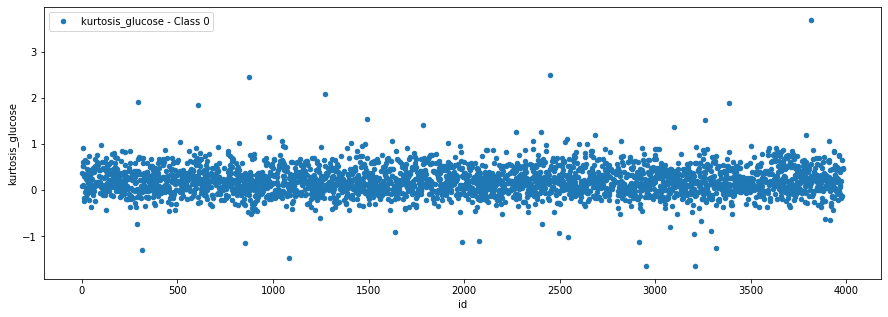

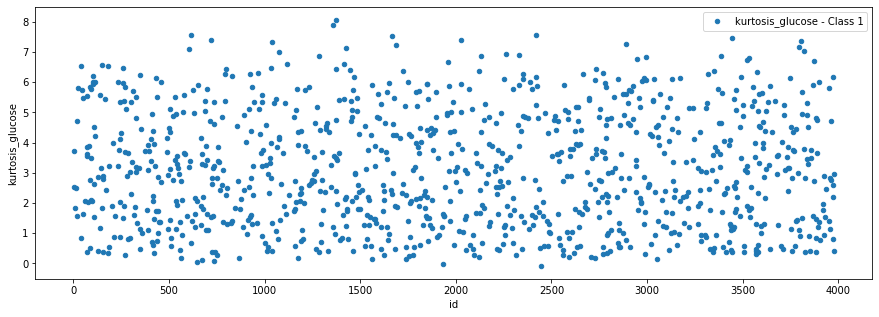

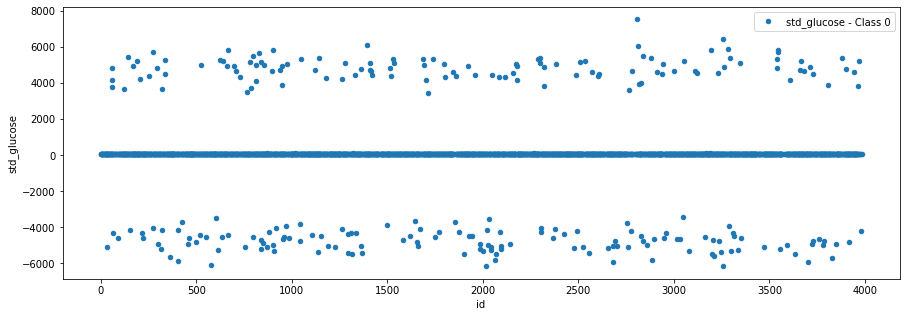

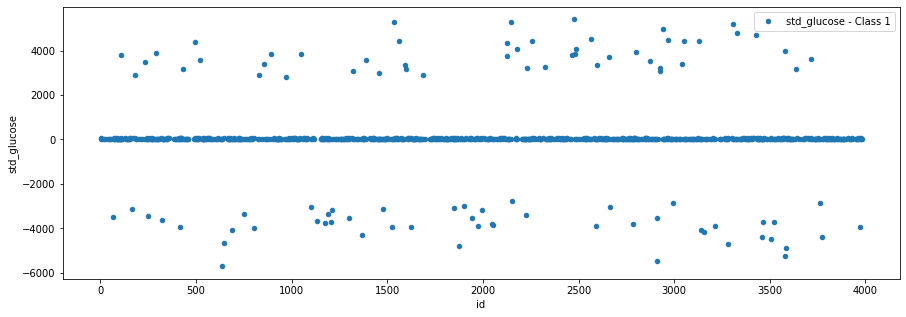

In [11]:
def draw_graph(l, d, c):
    graph_data = d[[c,'id']]
    graph_data.plot.scatter(label=l,x='id',y=c,figsize=(15,5)).plot()
    
for gl in ['skewness_glucose', 'mean_glucose', 'kurtosis_glucose', 'std_glucose']:
    for cl in range(2):
        d=data2[data2['class']==cl]
        draw_graph(gl+' - Class '+str(cl),d,gl)

In [12]:
# Find name duplicates in data
data[data.duplicated(['name'])]

,id,name,address,age,sex,date_of_birth


In [13]:
# Find name duplicates in data2
data2[data2.duplicated(['name'])]

,id,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
219,219,Maurice Riley,"58487 Schneider Street\r\nGriffinfurt, RI 56689",White,Divorced,Machine-op-inspct,f,9.0,NaN,0.220759,...,HS-grad,199816.0,0.0,-4594.807954,<=50K,"{'mean_oxygen':'2.526755853','std_oxygen':'14....",United-States,40.0,NaN,Private
474,474,Raymundo Marceau,"993 Heather View\r\nCarolynhaven, UT 99182",White,Never-married,Adm-clerical,f,9.0,Own-child,0.912863,...,HS-grad,161063.0,0.0,45.060099,<=50K,"{'mean_oxygen':'2.034280936','std_oxygen':'15....",United-States,40.0,0.0,Private
853,853,Jackson Moorehouse,"621 William Skyway\r\nPort Mark, LA 44554",White,Married-civ-spouse,Adm-clerical,NaN,NaN,Husband,0.251593,...,Bachelors,176814.0,0.0,5004.234962,>50K,"{'mean_oxygen':'2.581103679','std_oxygen':'16....",United-States,NaN,0.0,Private
1010,1010,Adam Perry,"02726 Hale Lane\r\nLynchmouth, HI 33466",White,Widowed,Adm-clerical,f,10.0,Unmarried,NaN,...,Some-college,156089.0,1.0,45.074068,NaN,NaN,United-States,40.0,0.0,NaN
1355,1355,Michael Atchison,"4214 Kim Path\r\nLake Crystalstad, PA 11945",White,Married-civ-spouse,Sales,f,NaN,Husband,0.765886,...,Bachelors,198223.0,0.0,43.975268,>50K,"{'mean_oxygen':'2.956521739','std_oxygen':'15....",United-States,45.0,1902.0,Private
1382,1382,Thomas Porter,"930 Calvin Highway Suite 062\r\nEast Samuel, H...",NaN,Married-civ-spouse,Machine-op-inspct,f,9.0,Husband,NaN,...,HS-grad,192588.0,0.0,61.315654,NaN,"{'mean_oxygen':'91.55183946','std_oxygen':'102...",NaN,40.0,0.0,Private
1568,1568,Michael Barnum,"9740 Joshua Roads\r\nVazquezmouth, TN 15386",NaN,Married-civ-spouse,Exec-managerial,f,NaN,Husband,0.796410,...,HS-grad,223327.0,NaN,40.813601,>50K,NaN,NaN,NaN,0.0,Private
1588,1588,Raul Vernon,"198 Wright Street Suite 397\r\nWendyshire, TN ...",Black,Never-married,NaN,f,9.0,Not-in-family,NaN,...,HS-grad,NaN,0.0,NaN,<=50K,"{'mean_oxygen':'5.973244147000001','std_oxygen...",NaN,40.0,0.0,Private
1957,1957,William Valdez,"51548 John Branch\r\nEast Zacharyberg, AZ 21129",White,Married-civ-spouse,Exec-managerial,f,9.0,Husband,0.284425,...,HS-grad,165667.0,0.0,NaN,<=50K,"{'mean_oxygen':'6.505016722000001','std_oxygen...",United-States,40.0,0.0,Self-emp-inc
1987,1987,David Amaya,4394 Rebecca Extension Suite 442\r\nNorth Jess...,White,Married-civ-spouse,NaN,f,9.0,Husband,-0.724337,...,HS-grad,207668.0,0.0,51.445226,<=50K,"{'mean_oxygen':'2.843645485','std_oxygen':'20....",United-States,50.0,0.0,Private


In [14]:
# Check the difference between 2 entries having the same name
data2[data2['name']=='Raul Vernon']

,id,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
36,36,Raul Vernon,"198 Wright Street Suite 397\r\nWendyshire, TN ...",NaN,Never-married,Machine-op-inspct,f,9.0,Not-in-family,0.46608,...,HS-grad,221447.0,0.0,43.50211,<=50K,"{'mean_oxygen':'5.973244147000001','std_oxygen...",United-States,40.0,0.0,Private
1588,1588,Raul Vernon,"198 Wright Street Suite 397\r\nWendyshire, TN ...",Black,Never-married,NaN,f,9.0,Not-in-family,NaN,...,HS-grad,NaN,0.0,NaN,<=50K,"{'mean_oxygen':'5.973244147000001','std_oxygen...",NaN,40.0,0.0,Private


In [15]:
d2=[]
for d in data2[data2.duplicated(['name'])]['name']:
    d2.append(data2[data2['name']==d])
d2[1]

,id,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
124,124,Raymundo Marceau,"993 Heather View\r\nCarolynhaven, UT 99182",NaN,Never-married,NaN,f,NaN,Own-child,0.912863,...,HS-grad,161063.0,0.0,45.060099,<=50K,"{'mean_oxygen':'2.034280936','std_oxygen':'15....",NaN,40.0,0.0,Private
474,474,Raymundo Marceau,"993 Heather View\r\nCarolynhaven, UT 99182",White,Never-married,Adm-clerical,f,9.0,Own-child,0.912863,...,HS-grad,161063.0,0.0,45.060099,<=50K,"{'mean_oxygen':'2.034280936','std_oxygen':'15....",United-States,40.0,0.0,Private


In [16]:
# Check column names
data.columns

Index(['id', 'name', 'address', 'age', 'sex', 'date_of_birth'], dtype='object')

In [17]:
# Check column names
data2.columns

Index(['id', 'name', 'address', 'race', 'marital-status', 'occupation',
       'pregnant', 'education-num', 'relationship', 'skewness_glucose',
       'mean_glucose', 'capital-gain', 'kurtosis_glucose', 'education',
       'fnlwgt', 'class', 'std_glucose', 'income', 'medical_info',
       'native-country', 'hours-per-week', 'capital-loss', 'workclass'],
      dtype='object')

In [18]:
# Check medical info
data2['medical_info'][0]

"{'mean_oxygen':'10.03511706','std_oxygen':'35.25964994','kurtosis_oxygen':'3.851439847','skewness_oxygen':'14.77564968'}"

## Predspracovanie (max. 18b)

Na základe identifikovaných problémov v dátach a návrhu ich riešenia v predchádzajúcej fáze treba zrealizovať predspracovanie. Výsledkom by mala byť upravená dátová sada (vo formáte `csv`) vo vhodnom tvare pre strojové učenie. To znamená, že jedno pozorovanie musí byť opísané jedným riadkom tabuľky; zároveň, keďže v tretej fáze budeme pracovať s algoritmom, ktorého implementácia podporuje len numerické dáta, bude potrebné všetky nenumerické atribúty transformovať na numerické. Napokon, keďže sa predspracovaním mohol zmeniť tvar a charakteristiky dát (počet atribútov, distribúcie hodnôt a pod.), treba znovu zrealizovať podstatné časti prieskumnej analýzy. Významnú časť hodnotenia bude predstavovať znovupoužiteľnosť (replikovateľnosť) predspracovania.

V tejto fáze sa od vás očakáva:
- **Integrácia dát a prípadná deduplikácia záznamov (4b).** Výsledkom by mala byť jednotná tabuľková reprezentácia dát, ktorá bude predstavovať vstup pre ďalšie spracovanie a (v 3. fáze) strojové učenie.
- **Realizácia krokov predspracovania dát a ich zdokumentovanie (5b).** 
  - Pri riešení chýbajúcich hodnôt vyskúšajte rôzne stratégie (očakáva sa vyskúšanie minimálne dvoch stratégií, pričom aspoň jedna z nich musí byť zvolená z posledných troch menovaných):
    - nahradenie chýbajúcej hodnoty mediánom
    - nahradenie chýbajúcej hodnoty priemerom
    - nahradenie chýbajúcej hodnoty pomerom ku korelovanému atribútu
    - nahradenie chýbajúcej hodnoty priemerom segmentu
    - nahradenie chýbajúcej hodnoty pomocou lineárnej regresie
    - nahradenie chýbajúcej hodnoty pomocou algoritmu k-najbližších susedov
  - Podobne postupujte aj pri riešení vychýlených (odľahlých) hodnôt, pričom vyskúšajte aspoň dve  zo stratégií uvedených nižšie:
    - odstránenie vychýlených (odľahlých) pozorovaní
    - nahradenie vychýlenej hodnoty hraničnými hodnotami rozdelenia (5 percentilom, resp. 95 percentilom)
    - transformácia atribútu s vychýlenými hodnotami pomocou zvolenej funkcie (logaritmus, odmocnina a pod.)
- **Znovupoužiteľnosť predspracovania (5b).** Upravte váš kód realizujúci predspracovanie trénovacej množiny tak, aby ho bolo možné bez ďalších úprav znovupoužiť na predspracovanie validačnej, resp. testovacej množiny (ich predspracovanie sa pritom v tej fáze nevyžaduje, odovzdaný kód v `Jupyter Notebooku` na to však musí byť pripravený). Očakáva sa preto, že bude predspracovanie realizované pomocou funkcií alebo využijete možnosti knižnice `sklearn.pipeline`. Častým problémom býva využitie informácií, ktoré nie sú dostupné v čase zbierania údajov (napr. štatistické informácie o celej testovacej sade pri spracovaní trénovacích údajov alebo aj pri spracovaní jednotlivých pozorovaní z testovacej sady), čím môžete do trénovania zaniesť znalosť z validačnej alebo testovacej množiny; vaše riešenie toto musí ošetrovať.
- **Opätovná realizácia podstatných častí prieskumnej analýzy (4b).** V rámci nej by ste mali vedieť zodpovedať na otázku, ako sa zmenili distribúcie hodnôt po realizácii krokov predspracovania (t. j. treba ju realizovať len tam, kde vaším predspracovaním došlo k nejakým zmenám).

Správa sa odovzdáva v 9. týždni semestra na cvičení (dvojica svojmu cvičiacemu odprezentuje vykonané predspracovanie v `Jupyter Notebooku`). Následne správu elektronicky odovzdá jeden člen z  dvojice do systému AIS do **nedele 24.11.2019 do 23:59**.

In [ ]:
# Remove time from the date_of_birth
data['date_of_birth'] = data['date_of_birth'].str.split(' ',expand=True)[0]
data.head(30)

In [ ]:
# Replace '/' characters to '-' characters in date_of_birth
data['date_of_birth'] = data['date_of_birth'].str.replace('/','-')
data.head(30)

In [ ]:
# Replace NaN with 0
data = data.fillna(value = 0)
data.head(30)

In [ ]:
#Fix non-numeric age values
def fix_age(age):
    try:
        return int(age)
    except:
        return 0
data['age']=data['age'].apply(fix_age)

In [ ]:
# Check people with age greater than 90, 
# to know how to properly convert 2 digit date_of_birth year field values to 4 digit one
data[data['age']>90] 

In [ ]:
# Fix the date format in the date_of_birth, make it consistently being yyyy-mm-dd
def fix_date(date):
    s = date.split('-')
    if len(s[0]) == 4: # Don't need to fix anything if the first field is a 4 digit year number
        return date
    if len(s[2]) == 4: # Replace dd-mm-yyyy format to yyyy-mm-dd format
        return s[2]+"-"+s[1]+"-"+s[0]
    # Replace yy-mm-dd format to yyyy-mm-dd format
    #
    # If the last 2 digit of the 4 digit year field is bigger than 20,
    # then we expect a date of birth between 1921 and 1999, otherwise between 2000 and 2020,
    # because we have verified earlier that we don't have people older than 90 years old in such date format
    if int(s[0]) > 20: 
        return '20'+s[0]+'-'+s[1]+'-'+s[2]
    else:
        return '19'+s[0]+'-'+s[1]+'-'+s[2]
    return date
data['date_of_birth']=data['date_of_birth'].apply(fix_date)
data.head(30)

In [ ]:
# Approximate the date of the dataset by adding the age of people to their date_of_birth. Choose the highest value.
def add_age(row):
    return str(int(row['date_of_birth'][:4])+row['age'])+row['date_of_birth'][4:]
dataset_date=data.apply(add_age,axis=1)
#dataset_date.sort


In [ ]:
# Calculate the age of people based on the start of the analysis date (25th of October 2019)